<img src="../_resources/mgnify_logo.png" width="200px">

# Fetch a Study using MGnifyR; download the metadata for all of its Analyses

The [MGnify API](https://www.ebi.ac.uk/metagenomics/api/v1) returns data and relationships as JSON. 
[MGnifyR](https://github.com/beadyallen/MGnifyR) is a package to help you read MGnify data into your R analyses.

**This example shows you how fetch the Analyses for a Study into a Phyloseq object**

You can find all of the other "API endpoints" using the [Browsable API interface in your web browser](https://www.ebi.ac.uk/metagenomics/api/v1).

This is an interactive code notebook (a Jupyter Notebook).
To run this code, click into each cell and press the ▶ button in the top toolbar, or press `shift+enter`.

---

In [5]:
MGNIFY_STUDY_ACCESSION = "MGYS00005116"

In [6]:
library(vegan)
library(ggplot2)
library(phyloseq)

library(MGnifyR)

mg <- mgnify_client(usecache = T, cache_dir = '/tmp/mgnify_cache')

## Fetch a list of the Analyses for the Study

In [14]:
analyses_accessions <- mgnify_analyses_from_studies(mg, MGNIFY_STUDY_ACCESSION)
analyses_accessions

  |======================================================================| 100%


[1] "MGYA00571587" "MGYA00571730" "MGYA00383350" "MGYA00383351"

## Download metadata for all of the Analyses
Put it into a dataframe.

In [15]:
analyses_metadata_df <- mgnify_get_analyses_metadata(mg, analyses_accessions)

  |======================================================================| 100%


## Display metadata
The table could be big, so let's look at a sample of it (`head`)

In [16]:
t(head(analyses_metadata_df))

,MGYA00571587,MGYA00571730,MGYA00383350,MGYA00383351
analysis_experiment-type,amplicon,amplicon,amplicon,amplicon
analysis_analysis-status,completed,completed,completed,completed
analysis_accession,MGYA00571587,MGYA00571730,MGYA00383350,MGYA00383351
analysis_pipeline-version,5.0,5.0,4.1,4.1
analysis_complete-time,2020-09-30T09:00:06,2020-10-07T08:41:57,2019-10-14T00:00:00,2019-10-14T00:00:00
analysis_instrument-platform,LS454,LS454,LS454,LS454
analysis_instrument-model,454 GS FLX Titanium,454 GS FLX Titanium,454 GS FLX Titanium,454 GS FLX Titanium
analysis_Submitted nucleotide sequences,91897,40095,91897,40095
analysis_Nucleotide sequences after format-specific filtering,78920,35304,91777,39840
analysis_Nucleotide sequences after length filtering,78920,35304,78920,35304


## Convert to [phyloseq](https://joey711.github.io/phyloseq/)
> The phyloseq package is a tool to import, store, analyze, and graphically display complex phylogenetic sequencing data that has already been clustered into Operational Taxonomic Units (OTUs), especially when there is associated sample data, phylogenetic tree, and/or taxonomic assignment of the OTUs.

In [17]:
analyses_ps <- mgnify_get_analyses_phyloseq(mg, analyses_metadata_df$analysis_accession, tax_SU = "SSU")

  |======================================================================| 100%


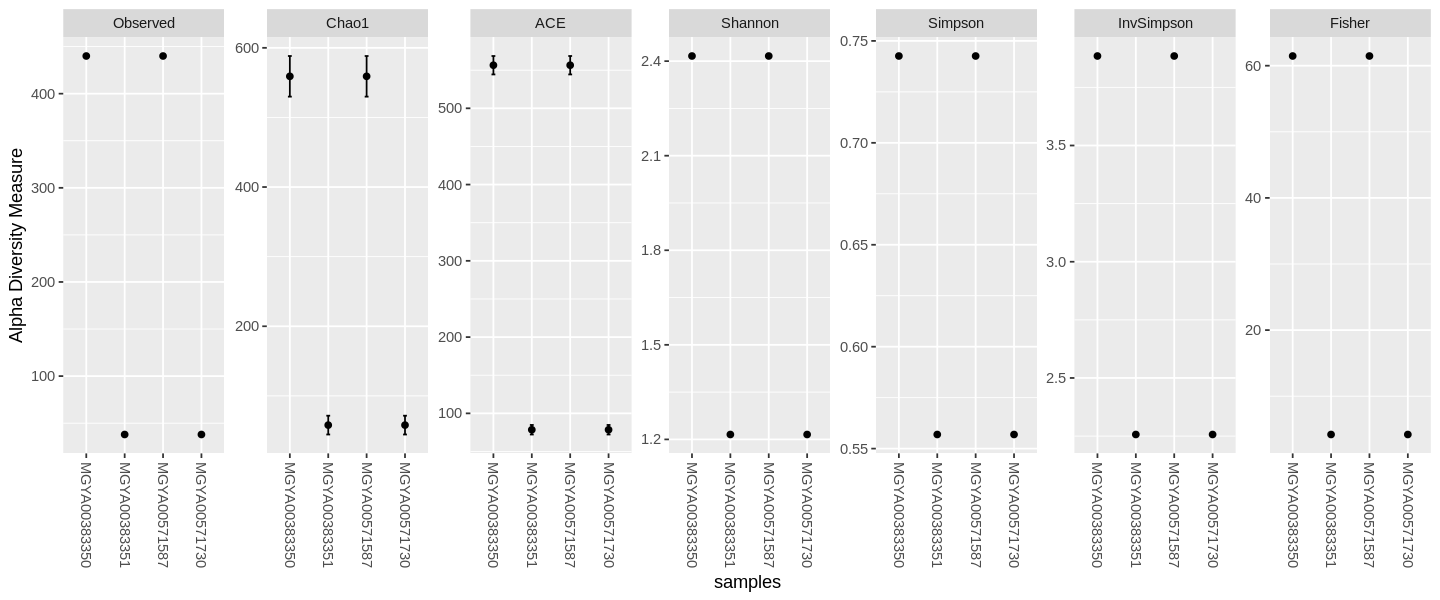

In [22]:
options(repr.plot.width=12, repr.plot.height=5)
plot_phyloseq(analyses_ps, )